In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
x_samp = np.linspace(-1,2,5)
y_samp = x_samp + x_samp**2 - 5*x_samp**3 + 7*np.exp(-(x_samp-0.4)**2/0.2)
x = np.linspace(-1.5,2.5,500)
y = x + x**2 - 5*x**3 + 7*np.exp(-(x-0.4)**2/0.2)
sig_y = np.std(y)
sig_x = np.std(x)
mu_y = np.mean(y)
mu_x = np.mean(x)
x_samp = (x_samp-mu_x)/sig_x
y_samp = (y_samp-mu_y)/sig_y
x = (x-mu_x)/sig_x
y = (y-mu_y)/sig_y

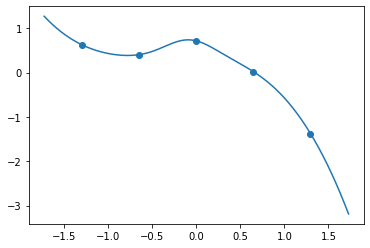

In [3]:
plt.plot(x,y)
plt.scatter(x_samp,y_samp)
plt.show()

In [14]:
x_poly = [[x_samp[0]**(i+1) for i in range(5)],[x_samp[2]**(i+1) for i in range(5)],[x_samp[4]**(i+1) for i in range(5)]]
y_poly = [y_samp[0],y_samp[2],y_samp[4]]
                                                                                             
tensor_x = torch.Tensor(x_poly) # transform to torch tensor
tensor_y = torch.Tensor(y_poly)
                                                                                             
my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
dataloader = DataLoader(my_dataset, batch_size=3, shuffle=True) # create your dataloader
                                                                                             

In [24]:
def featurize(x):
    x_f = []
    for x_samp in x:
        x_f.append([x_samp**(i+1) for i in range(5)])
    return torch.Tensor(x_f)

In [41]:
class poly_Regressor(nn.Module):
    def __init__(self):
        super(poly_Regressor, self).__init__()
        self.linear1 = nn.Linear(5, 1)

    def forward(self, x):
        return torch.squeeze(self.linear1(x))

model_poly1 = poly_Regressor()
print(model_poly1)

poly_Regressor(
  (linear1): Linear(in_features=5, out_features=1, bias=True)
)


In [42]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(model_poly1.parameters(), lr=0.1, momentum=0.9)
loss_func = torch.nn.MSELoss()

#Training Loop
n_epochs = 60
print(f'{"Epoch".ljust(7)} {"Training Loss".ljust(20)}')

epochs = []
val_losses = []
train_losses = []
parameters = []

for epoch in range(n_epochs):
    train_loss = []
    for i, data in enumerate(dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_poly1(inputs)
        loss = loss_func(outputs, labels)
        train_loss.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    train_loss = np.mean(np.array(train_loss))
    if epoch%10 == 0:
        epochs.append(epoch)
        #parameters.append(model_relu.linear1.weight.data)
        #val_losses.append(float(loss.detach().numpy()))
        train_losses.append(float(train_loss))
        train_loss = str(round(float(train_loss),4)).ljust(20)
        #valid_loss = str(round(float(loss.detach().numpy()),4)).ljust(20)
        i_epoch    = str(epoch).ljust(7)
        print(f'{i_epoch} {train_loss}')

Epoch   Training Loss       
0       0.2984              
10      0.0466              
20      0.035               
30      0.0122              
40      0.0026              
50      0.0017              


In [48]:
model_poly2 = poly_Regressor()


# Define Optimizer and Loss Function
optimizer = torch.optim.LBFGS(model_poly2.parameters())
loss_func = torch.nn.MSELoss()

#Training Loop
n_epochs = 60
print(f'{"Epoch".ljust(7)} {"Training Loss".ljust(20)}')

epochs = []
val_losses = []
train_losses = []
parameters = []

for epoch in range(n_epochs):
    train_loss = []
    for i, data in enumerate(dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_poly2(inputs)
        loss = loss_func(outputs, labels)
        train_loss.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    train_loss = np.mean(np.array(train_loss))
    if epoch%10 == 0:
        epochs.append(epoch)
        #parameters.append(model_relu.linear1.weight.data)
        #val_losses.append(float(loss.detach().numpy()))
        train_losses.append(float(train_loss))
        train_loss = str(round(float(train_loss),4)).ljust(20)
        #valid_loss = str(round(float(loss.detach().numpy()),4)).ljust(20)
        i_epoch    = str(epoch).ljust(7)
        print(f'{i_epoch} {train_loss}')

Epoch   Training Loss       


TypeError: step() missing 1 required positional argument: 'closure'

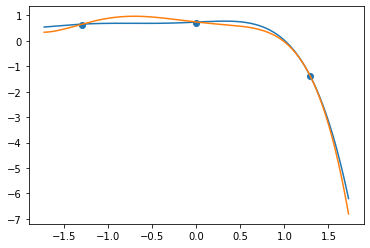

In [46]:
plt.plot(x,model_poly1(featurize(x)).detach().numpy())
plt.plot(x,model_poly2(featurize(x)).detach().numpy())
plt.scatter(x_samp[0::2],y_samp[0::2])

#y = model_poly1(featurize(x))
#y

In [244]:
tensor_x = torch.Tensor(x_samp).unsqueeze(-1) # transform to torch tensor
tensor_y = torch.Tensor(y_samp)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
dataloader = DataLoader(my_dataset, batch_size=5, shuffle=True) # create your dataloader


In [245]:
class NN_Regressor_relu(nn.Module):
    def __init__(self):
        super(NN_Regressor_relu, self).__init__()
        self.linear1 = nn.Linear(1, 16)
        self.linear2 = nn.Linear(16, 16)
        self.linear3 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        return torch.squeeze(self.linear3(x))

model_relu = NN_Regressor_relu()
print(model_relu)

NN_Regressor_relu(
  (linear1): Linear(in_features=1, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=1, bias=True)
)


In [272]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(model_relu.parameters(), lr=0.01, momentum=0.9)
loss_func = torch.nn.MSELoss()

In [273]:
#Training Loop
n_epochs = 1000
print(f'{"Epoch".ljust(7)} {"Training Loss".ljust(20)}')

epochs = []
val_losses = []
train_losses = []
parameters = []

for epoch in range(n_epochs):
    train_loss = []
    for i, data in enumerate(dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_relu(inputs)
        loss = loss_func(outputs, labels)
        train_loss.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    train_loss = np.mean(np.array(train_loss))
    if epoch%100 == 0:
        epochs.append(epoch)
        #parameters.append(model_relu.linear1.weight.data)
        #val_losses.append(float(loss.detach().numpy()))
        train_losses.append(float(train_loss))
        train_loss = str(round(float(train_loss),4)).ljust(20)
        #valid_loss = str(round(float(loss.detach().numpy()),4)).ljust(20)
        i_epoch    = str(epoch).ljust(7)
        print(f'{i_epoch} {train_loss}')

Epoch   Training Loss       
0       0.0078              
100     0.0037              
200     0.0019              
300     0.0008              
400     0.0003              
500     0.0001              
600     0.0                 
700     0.0                 
800     0.0                 
900     0.0                 


In [274]:
tensor_x_func = torch.Tensor(x).unsqueeze(-1)
tensor_y_relu = model_relu(tensor_x_func).detach().numpy()

In [249]:
class NN_Regressor_sigmoid(nn.Module):
    def __init__(self):
        super(NN_Regressor_sigmoid, self).__init__()
        self.linear1 = nn.Linear(1, 16)
        self.linear2 = nn.Linear(16, 16)
        self.linear3 = nn.Linear(16, 1)
        self.initialize()
        
    def initialize(self):
        print('initializing')
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)
        nn.init.xavier_uniform_(self.linear3.weight)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return torch.squeeze(self.linear3(x))

model_sigmoid = NN_Regressor_sigmoid()
print(model_sigmoid)

initializing
NN_Regressor_sigmoid(
  (linear1): Linear(in_features=1, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=1, bias=True)
)


In [253]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(model_sigmoid.parameters(), lr=0.01, momentum=0.9)
loss_func = torch.nn.MSELoss()

In [255]:
#Training Loop
n_epochs = 10000
print(f'{"Epoch".ljust(7)} {"Training Loss".ljust(20)}')

epochs = []
val_losses = []
train_losses = []
parameters = []

for epoch in range(n_epochs):
    train_loss = []
    for i, data in enumerate(dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_sigmoid(inputs)
        loss = loss_func(outputs, labels)
        train_loss.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    train_loss = np.mean(np.array(train_loss))
    if epoch%100 == 0:
        epochs.append(epoch)
        #parameters.append(model_sigmoid.linear1.weight.data)
        #val_losses.append(float(loss.detach().numpy()))
        train_losses.append(float(train_loss))
        train_loss = str(round(float(train_loss),4)).ljust(20)
        #valid_loss = str(round(float(loss.detach().numpy()),4)).ljust(20)
        i_epoch    = str(epoch).ljust(7)
        print(f'{i_epoch} {train_loss}')

Epoch   Training Loss       
0       0.0074              
100     0.0073              
200     0.0072              
300     0.0071              
400     0.007               
500     0.007               
600     0.0069              
700     0.0068              
800     0.0067              
900     0.0066              
1000    0.0065              
1100    0.0064              
1200    0.0063              
1300    0.0062              
1400    0.0061              
1500    0.006               
1600    0.0059              
1700    0.0058              
1800    0.0057              
1900    0.0056              
2000    0.0055              
2100    0.0054              
2200    0.0052              
2300    0.0051              
2400    0.005               
2500    0.0049              
2600    0.0048              
2700    0.0046              
2800    0.0045              
2900    0.0044              
3000    0.0043              
3100    0.0041              
3200    0.004               
3300    0.0039

In [256]:
tensor_x_func = torch.Tensor(x).unsqueeze(-1)
tensor_y_sigmoid = model_sigmoid(tensor_x_func).detach().numpy()

In [264]:
class NN_Regressor_silu(nn.Module):
    def __init__(self):
        super(NN_Regressor_silu, self).__init__()
        self.linear1 = nn.Linear(1, 16)
        self.linear2 = nn.Linear(16, 16)
        self.linear3 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.silu(self.linear1(x))
        x = F.silu(self.linear2(x))
        return torch.squeeze(self.linear3(x))

model_silu = NN_Regressor_silu()
print(model_silu)

NN_Regressor_silu(
  (linear1): Linear(in_features=1, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=1, bias=True)
)


In [265]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(model_silu.parameters(), lr=0.01, momentum=0.9)
loss_func = torch.nn.MSELoss()

In [268]:
#Training Loop
n_epochs = 1000
print(f'{"Epoch".ljust(7)} {"Training Loss".ljust(20)}')

epochs = []
val_losses = []
train_losses = []
parameters = []

for epoch in range(n_epochs):
    train_loss = []
    for i, data in enumerate(dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_silu(inputs)
        loss = loss_func(outputs, labels)
        train_loss.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    train_loss = np.mean(np.array(train_loss))
    if epoch%100 == 0:
        epochs.append(epoch)
        #parameters.append(model_silu.linear1.weight.data)
        #val_losses.append(float(loss.detach().numpy()))
        train_losses.append(float(train_loss))
        train_loss = str(round(float(train_loss),4)).ljust(20)
        #valid_loss = str(round(float(loss.detach().numpy()),4)).ljust(20)
        i_epoch    = str(epoch).ljust(7)
        print(f'{i_epoch} {train_loss}')

Epoch   Training Loss       
0       0.0038              
100     0.0027              
200     0.0018              
300     0.0011              
400     0.0007              
500     0.0004              
600     0.0002              
700     0.0001              
800     0.0                 
900     0.0                 


In [269]:
tensor_x_func = torch.Tensor(x).unsqueeze(-1)
tensor_y_silu = model_silu(tensor_x_func).detach().numpy()

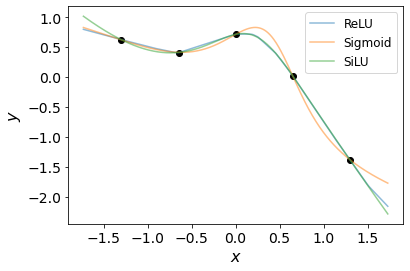

In [276]:
plt.plot(x,tensor_y_relu,label='ReLU',alpha=0.5)
plt.plot(x,tensor_y_sigmoid,label='Sigmoid',alpha=0.5)
plt.plot(x,tensor_y_silu,label='SiLU',alpha=0.5)

#formating
#plt.xlim([0.0,1.5])
#plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

#plt.plot(x,y)
plt.scatter(x_samp,y_samp,c='k')

plt.savefig('activations.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [149]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    

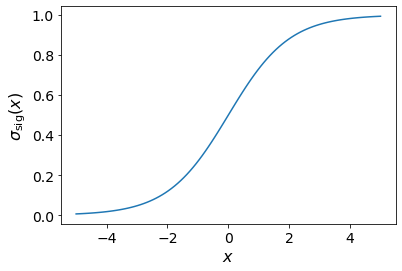

In [277]:
x = np.linspace(-5,5,100)
plt.plot(x,sigmoid(x))

#formating
#plt.xlim([0.0,1.5])
#plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$\sigma_\mathrm{sig}(x)$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

plt.savefig('sigmoid.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

In [156]:
def relu(x):
    res = np.zeros_like(x)
    res[x>0] = x[x>0]
    return res
    

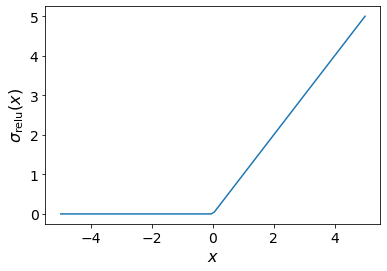

In [278]:
x = np.linspace(-5,5,100)
plt.plot(x,relu(x))

#formating
#plt.xlim([0.0,1.5])
#plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$\sigma_\mathrm{relu}(x)$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

plt.savefig('relu.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

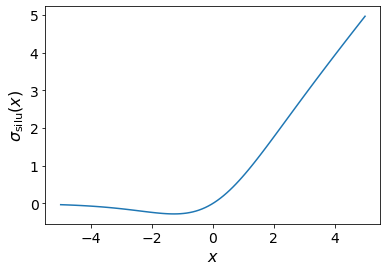

In [279]:
x = np.linspace(-5,5,100)
plt.plot(x,sigmoid(x)*x)

#formating
#plt.xlim([0.0,1.5])
#plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$\sigma_\mathrm{silu}(x)$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

plt.savefig('silu.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

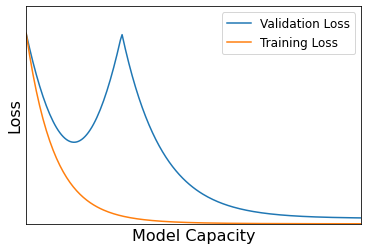

In [153]:
#double descent plot
cap = np.linspace(-2,5,200)
val_loss = np.zeros(200)
train_loss = np.zeros(200)
val_loss[cap<=0.] = 0.4*(cap[cap<=0.]+1)**2+0.3
val_loss[cap>0.] = (0.4+0.3-0.02)*np.exp(-1.2*cap[cap>0.])+0.02
train_loss = 0.1*(0.4+0.3)*np.exp(-0.9*(cap+2))+0.9*(0.4+0.3)*np.exp(-1.8*(cap+2))
plt.plot(cap,val_loss,label="Validation Loss")
plt.plot(cap,train_loss,label="Training Loss")

#formating
plt.xlim([-2,5])
plt.ylim([0.,0.8])

#plt.yscale('log')
plt.xlabel('Model Capacity',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.xticks([],fontsize=14)
plt.yticks([],fontsize=14)
plt.legend(fontsize=12)

plt.savefig('double_descent.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

In [152]:
pwd

'/home/margraf/Dropbox/chemML/ju-book/notebooks'

In [120]:
x_space = np.linspace(-1.1,1.1,100)
x = np.array([-1,0,1])
y = np.array([-0.7,0.0,0.1])

In [127]:
def featurize(x,order=5):
    x_f = []
    for x_samp in x:
        x_f.append([x_samp**(i) for i in range(order)])
    return np.array(x_f)

def fit_poly(x,y,order=5,scale=1.0):
    X = featurize(x,order=order)
    n_rand = order-len(y)
    fixed_coefs = scale*(np.random.rand(n_rand)-0.5)
    X_left = X[:,:-n_rand]
    X_right = X[:,-n_rand:].T
    #print(X)
    #print(X_left)
    #print(X_right)
    #print(fixed_coefs)
    #print(X_right@fixed_coefs)
    y_mod = y - fixed_coefs@X_right
    coef = np.linalg.solve(X_left,y_mod)
    coef = list(coef)
    for i in range(n_rand):
        coef.append(fixed_coefs[i])
    return np.array(coef)

def evaluate_poly(x,coef):
    order = len(coef)
    X = featurize(x,order=order)
    y = X@coef
    return y

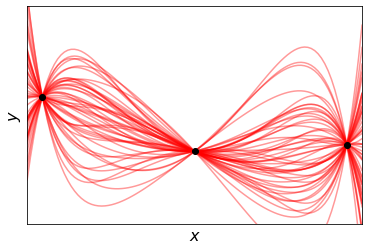

In [148]:
coefs = []
for i in range(50):
    coefs.append(fit_poly(x,y,order=8,scale=4.0))

for i in range(50):
    plt.plot(x_space,evaluate_poly(x_space,coefs[i]),alpha=0.4,c='r',zorder=1)

plt.scatter(x,y,c='k',zorder=2)

#formating
plt.xlim([-1.1,1.1])
plt.ylim([-2,4])

#plt.yscale('log')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks([],fontsize=14)
plt.yticks([],fontsize=14)
#plt.legend(fontsize=12)

plt.savefig('reg_ensemble1.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

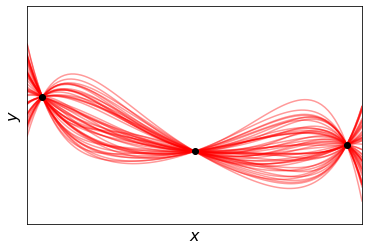

In [149]:
coefs = []
for i in range(50):
    coefs.append(fit_poly(x,y,order=8,scale=2.0))

for i in range(50):
    plt.plot(x_space,evaluate_poly(x_space,coefs[i]),alpha=0.4,c='r',zorder=1)

plt.scatter(x,y,c='k',zorder=2)

#formating
plt.xlim([-1.1,1.1])
plt.ylim([-2,4])

#plt.yscale('log')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks([],fontsize=14)
plt.yticks([],fontsize=14)
#plt.legend(fontsize=12)

plt.savefig('reg_ensemble2.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

plt.show()

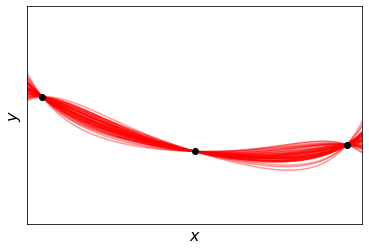

In [150]:
coefs = []
for i in range(50):
    coefs.append(fit_poly(x,y,order=8,scale=0.5))

for i in range(50):
    plt.plot(x_space,evaluate_poly(x_space,coefs[i]),alpha=0.4,c='r',zorder=1)

plt.scatter(x,y,c='k',zorder=2)

#formating
plt.xlim([-1.1,1.1])
plt.ylim([-2,4])

#plt.yscale('log')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks([],fontsize=14)
plt.yticks([],fontsize=14)
#plt.legend(fontsize=12)

plt.savefig('reg_ensemble3.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

plt.show()

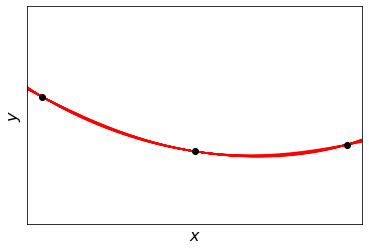

In [151]:
coefs = []
for i in range(50):
    coefs.append(fit_poly(x,y,order=8,scale=0.05))

for i in range(50):
    plt.plot(x_space,evaluate_poly(x_space,coefs[i]),alpha=0.4,c='r',zorder=1)

plt.scatter(x,y,c='k',zorder=2)

#formating
plt.xlim([-1.1,1.1])
plt.ylim([-2,4])

#plt.yscale('log')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks([],fontsize=14)
plt.yticks([],fontsize=14)
#plt.legend(fontsize=12)

plt.savefig('reg_ensemble4.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

plt.show()